In [3]:
print("현재 작업 디렉토리 : ", os.getcwd())

현재 작업 디렉토리 :  /media/vpraise/My Data/My Project/Deepfake/Git Branch/TUK-2024-DeepFakeDetection/backend/ml


In [4]:
### ✅ 1. 필요한 라이브러리 및 모듈 불러오기
import os
from process_video import extract_frames
from predict_deepfake_model import process_all_frames
import json
from IPython.display import display, Image

root_folder = "."

video_path = os.path.join(root_folder, "video/video.mp4")  # 분석할 영상 경로
frames_folder = os.path.join(root_folder, "frames")               # 프레임 저장 폴더

c:\Users\vprai\anaconda3\envs\dfML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
### ✅ 2. 영상 → 프레임 추출 셀
def extract_video_frames(video_path, output_folder="frames", fps=1):
    print(f"🎬 영상에서 프레임 추출 중...")
    extract_frames(video_path, output_folder, fps)
    print(f"✅ 프레임 추출 완료: {output_folder}")

# 사용 예시
extract_video_frames(video_path, frames_folder, fps=15)

🎬 영상에서 프레임 추출 중...
🎬 FPS: 30.0, Frame Interval: 2, Total Frames: 282
🖼️ 저장됨: .\frames\frame_0000.jpg
🖼️ 저장됨: .\frames\frame_0001.jpg
🖼️ 저장됨: .\frames\frame_0002.jpg
🖼️ 저장됨: .\frames\frame_0003.jpg
🖼️ 저장됨: .\frames\frame_0004.jpg
🖼️ 저장됨: .\frames\frame_0005.jpg
🖼️ 저장됨: .\frames\frame_0006.jpg
🖼️ 저장됨: .\frames\frame_0007.jpg
🖼️ 저장됨: .\frames\frame_0008.jpg
🖼️ 저장됨: .\frames\frame_0009.jpg
🖼️ 저장됨: .\frames\frame_0010.jpg
🖼️ 저장됨: .\frames\frame_0011.jpg
🖼️ 저장됨: .\frames\frame_0012.jpg
🖼️ 저장됨: .\frames\frame_0013.jpg
🖼️ 저장됨: .\frames\frame_0014.jpg
🖼️ 저장됨: .\frames\frame_0015.jpg
🖼️ 저장됨: .\frames\frame_0016.jpg
🖼️ 저장됨: .\frames\frame_0017.jpg
🖼️ 저장됨: .\frames\frame_0018.jpg
🖼️ 저장됨: .\frames\frame_0019.jpg
🖼️ 저장됨: .\frames\frame_0020.jpg
🖼️ 저장됨: .\frames\frame_0021.jpg
🖼️ 저장됨: .\frames\frame_0022.jpg
🖼️ 저장됨: .\frames\frame_0023.jpg
🖼️ 저장됨: .\frames\frame_0024.jpg
🖼️ 저장됨: .\frames\frame_0025.jpg
🖼️ 저장됨: .\frames\frame_0026.jpg
🖼️ 저장됨: .\frames\frame_0027.jpg
🖼️ 저장됨: .\frames\frame_0028.jpg
🖼️ 

In [6]:
### ✅ 3. 딥페이크 예측 (GradCAM 사용 여부 포함)
def run_deepfake_prediction(root_folder, batch_size=16, use_gradcam=True):
    print(f"🤖 딥페이크 예측 중... (GradCAM: {use_gradcam})")
    process_all_frames(root_folder, batch_size, use_gradcam)
    #print(f"✅ 예측 완료: {output_file}")

# 사용 예시
output_json = "results/deepfake_results.json"
run_deepfake_prediction(root_folder, batch_size=64, use_gradcam=True)

🤖 딥페이크 예측 중... (GradCAM: True)


🔍 Processing: 100%|██████████| 3/3 [00:08<00:00,  2.96s/it]


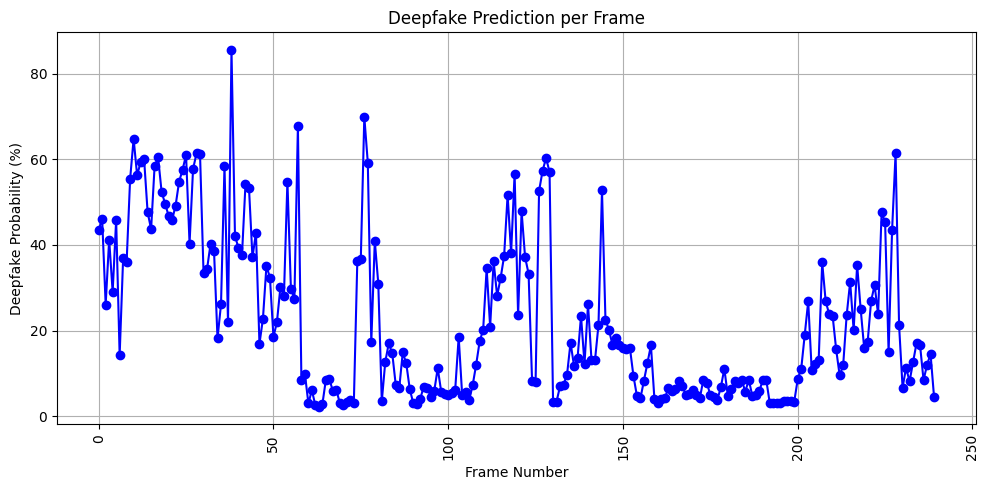

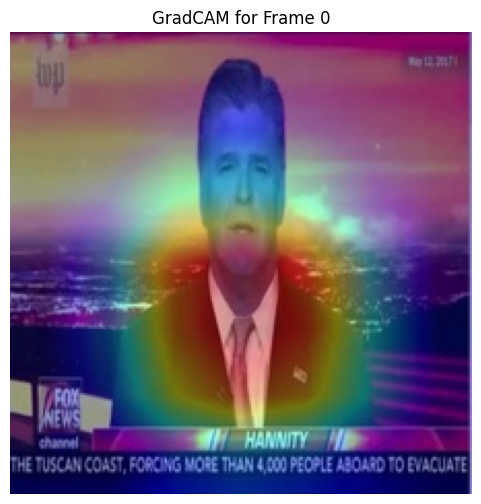

In [8]:
### ✅ 4. 결과 확인 및 GradCAM 시각화
def display_prediction_results(output_json, show_gradcam=False):
    import json
    import os
    import matplotlib.pyplot as plt
    from PIL import Image

    with open(output_json, "r") as file:
        data = json.load(file)

    # 프레임 이름(키)을 정렬하여 순서대로 처리
    frames = sorted(data.keys())
    probabilities = []
    frame_numbers = []
    gradcam_first = None
    gradcam_frame = None


    for frame in frames:
        result = data[frame]
        # 결과가 float인 경우와 dict인 경우를 모두 고려하여 확률 추출
        prob = result if isinstance(result, float) else result.get("probability", 0.0)
        probabilities.append(prob * 100)  # 백분율로 변환

        # 파일 이름에서 숫자 추출 (예: "frame_0001.jpg" -> 1)
        try:
            base = os.path.splitext(frame)[0]  # "frame_0001"
            num_str = base.split('_')[-1]
            frame_number = int(num_str)
        except Exception:
            frame_number = frame  # 파싱 실패 시 원래 이름 사용
        frame_numbers.append(frame_number)

        # 첫 번째 GradCAM 이미지 경로 확보 (존재할 경우)
        if show_gradcam and gradcam_first is None:
            gradcam_path = result.get("gradcam_path")
            if gradcam_path and os.path.exists(gradcam_path):
                gradcam_first = gradcam_path
                gradcam_frame = frame_number  # ← 변경: 원래 frame에서 frame_number로 수정

    # 확률 그래프 플롯
    plt.figure(figsize=(10, 5))
    plt.plot(frame_numbers, probabilities, marker='o', linestyle='-', color='b')
    plt.xlabel("Frame Number")
    plt.ylabel("Deepfake Probability (%)")
    plt.title("Deepfake Prediction per Frame")
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 첫 번째 GradCAM 이미지 표시
    if show_gradcam and gradcam_first is not None:
        img = Image.open(gradcam_first)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(f"GradCAM for Frame {gradcam_frame}")
        plt.axis('off')
        plt.show()

# 사용 예시
display_prediction_results(output_json, show_gradcam=True)



In [5]:
from predict_deepfake_model import model
print(model)

Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv

In [ ]:
import os
print("현재 작업 디렉토리:", os.getcwd())
frames_path = os.path.abspath(os.path.join("Project", "frames"))
print("frames 폴더 절대경로:", frames_path)
print("존재 여부:", os.path.exists(frames_path))


Current working directory: e:\학교자료\학교 자료\연구\졸업프로젝트\종합설계1\코드 작업
frames_folder = Project
존재 여부 = True
현재 작업 디렉토리: e:\학교자료\학교 자료\연구\졸업프로젝트\종합설계1\코드 작업


In [70]:
frames_folder = os.path.join("Project", "frames")
print("frames_folder 절대경로:", os.path.abspath(frames_folder))
print("존재 여부:", os.path.exists(os.path.abspath(frames_folder)))

frames_folder 절대경로: e:\학교자료\학교 자료\연구\졸업프로젝트\종합설계1\코드 작업\Project\frames
존재 여부: True
